In [99]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
arquivo_com_sensores = sorted(glob('data/new_data/TAG_iALL_PS_*.csv'))
target_file = "data/new_data/target_iALL_PS.csv"

In [68]:
arquivo_com_sensores

['data/new_data/TAG_iALL_PS_00.csv',
 'data/new_data/TAG_iALL_PS_01.csv',
 'data/new_data/TAG_iALL_PS_02.csv',
 'data/new_data/TAG_iALL_PS_03.csv',
 'data/new_data/TAG_iALL_PS_04.csv',
 'data/new_data/TAG_iALL_PS_05.csv',
 'data/new_data/TAG_iALL_PS_06.csv',
 'data/new_data/TAG_iALL_PS_07.csv',
 'data/new_data/TAG_iALL_PS_08.csv',
 'data/new_data/TAG_iALL_PS_09.csv',
 'data/new_data/TAG_iALL_PS_10.csv',
 'data/new_data/TAG_iALL_PS_11.csv',
 'data/new_data/TAG_iALL_PS_12.csv',
 'data/new_data/TAG_iALL_PS_13.csv',
 'data/new_data/TAG_iALL_PS_14.csv',
 'data/new_data/TAG_iALL_PS_15.csv',
 'data/new_data/TAG_iALL_PS_16.csv',
 'data/new_data/TAG_iALL_PS_17.csv',
 'data/new_data/TAG_iALL_PS_18.csv',
 'data/new_data/TAG_iALL_PS_19.csv',
 'data/new_data/TAG_iALL_PS_20.csv',
 'data/new_data/TAG_iALL_PS_21.csv',
 'data/new_data/TAG_iALL_PS_22.csv',
 'data/new_data/TAG_iALL_PS_23.csv',
 'data/new_data/TAG_iALL_PS_24.csv',
 'data/new_data/TAG_iALL_PS_25.csv',
 'data/new_data/TAG_iALL_PS_26.csv',
 

# Junta os df colocando eles em colunas

In [69]:
df_sensores = []
for file in arquivo_com_sensores:
    df = pd.read_csv(file) 
    if df.shape[1] > 1:  
        df.rename(columns={df.columns[1]: file.split("/")[-1].replace(".csv", "")}, inplace=True)
    df_sensores.append(df)

In [70]:
df_merged = df_sensores[0]
for df in df_sensores[1:]:
    df_merged = df_merged.merge(df, on="timestamp", how="inner")

In [71]:
df_target = pd.read_csv(target_file)
df_final = df_merged.merge(df_target, on="timestamp", how="inner")

In [72]:
df_final["timestamp"] = pd.to_datetime(df_final["timestamp"])
df_final = df_final.sort_values(by="timestamp")

# Faz o dataframe final com todos os dados

In [73]:
df_final.to_csv("dataset_final.csv", index=False)

# Exibir as primeiras linhas para conferir
print(df_final.head())

            timestamp  TAG_iALL_PS_00  TAG_iALL_PS_01  TAG_iALL_PS_02  \
0 2018-04-01 00:00:00        4.548754       90.886874       58.698896   
1 2018-04-01 00:01:00        7.887998       56.555373       80.802810   
2 2018-04-01 00:02:00        4.975919      182.086958       87.273632   
3 2018-04-01 00:03:00        6.304142       58.417235       75.059520   
4 2018-04-01 00:04:00        1.671733      108.946809       94.910470   

   TAG_iALL_PS_03  TAG_iALL_PS_04  TAG_iALL_PS_05  TAG_iALL_PS_06  \
0       89.301134     1011.733181       97.284889       33.248746   
1      120.898222     1358.466600      202.583688       32.494870   
2        9.914782     1056.489015      147.098428       36.402837   
3       64.167463     1619.924847      307.722320       34.283344   
4       14.551922      591.648283       -7.684779       30.980682   

   TAG_iALL_PS_07  TAG_iALL_PS_08  ...  TAG_iALL_PS_43  TAG_iALL_PS_44  \
0      -10.390227       29.262578  ...      154.291476      114.466107  

In [74]:
df_final.head()

,timestamp,TAG_iALL_PS_00,TAG_iALL_PS_01,TAG_iALL_PS_02,TAG_iALL_PS_03,TAG_iALL_PS_04,TAG_iALL_PS_05,TAG_iALL_PS_06,TAG_iALL_PS_07,TAG_iALL_PS_08,...,TAG_iALL_PS_43,TAG_iALL_PS_44,TAG_iALL_PS_45,TAG_iALL_PS_46,TAG_iALL_PS_47,TAG_iALL_PS_48,TAG_iALL_PS_49,TAG_iALL_PS_50,TAG_iALL_PS_51,target_iALL_PS
0,2018-04-01 00:00:00,4.548754,90.886874,58.698896,89.301134,1011.733181,97.284889,33.248746,-10.390227,29.262578,...,154.291476,114.466107,103.082616,119.246973,60.729332,310.022461,124.735196,426.651658,410.820484,NORMAL
1,2018-04-01 00:01:00,7.887998,56.555373,80.802810,120.898222,1358.466600,202.583688,32.494870,19.427739,61.038519,...,59.239207,90.076161,93.760055,63.457947,62.910653,306.084796,158.822485,375.316113,143.620728,NORMAL
2,2018-04-01 00:02:00,4.975919,182.086958,87.273632,9.914782,1056.489015,147.098428,36.402837,38.900027,30.304666,...,87.136301,99.274584,111.916792,60.560834,81.332910,353.863854,88.772027,444.809188,618.898000,NORMAL
3,2018-04-01 00:03:00,6.304142,58.417235,75.059520,64.167463,1619.924847,307.722320,34.283344,46.602862,44.859311,...,110.321579,103.978381,103.705604,24.141894,36.219671,301.563110,53.387484,414.052496,427.323378,NORMAL
4,2018-04-01 00:04:00,1.671733,108.946809,94.910470,14.551922,591.648283,-7.684779,30.980682,39.293311,1.229287,...,112.435498,103.170425,110.566095,53.913605,116.770552,298.957820,168.746952,431.548430,514.659884,NORMAL


In [75]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       220320 non-null  datetime64[ns]
 1   TAG_iALL_PS_00  210112 non-null  float64       
 2   TAG_iALL_PS_01  219951 non-null  float64       
 3   TAG_iALL_PS_02  220301 non-null  float64       
 4   TAG_iALL_PS_03  220301 non-null  float64       
 5   TAG_iALL_PS_04  220301 non-null  float64       
 6   TAG_iALL_PS_05  220301 non-null  float64       
 7   TAG_iALL_PS_06  215522 non-null  float64       
 8   TAG_iALL_PS_07  214869 non-null  float64       
 9   TAG_iALL_PS_08  215213 non-null  float64       
 10  TAG_iALL_PS_09  215725 non-null  float64       
 11  TAG_iALL_PS_10  220301 non-null  float64       
 12  TAG_iALL_PS_11  220301 non-null  float64       
 13  TAG_iALL_PS_12  220301 non-null  float64       
 14  TAG_iALL_PS_13  220301 non-null  flo

In [76]:
print("Total de linhas antes de tratar NaNs:", len(df_final))
print("\nQuantidade de NaNs por coluna:\n", df_final.isna().sum())

Total de linhas antes de tratar NaNs: 220320

Quantidade de NaNs por coluna:
 timestamp              0
TAG_iALL_PS_00     10208
TAG_iALL_PS_01       369
TAG_iALL_PS_02        19
TAG_iALL_PS_03        19
TAG_iALL_PS_04        19
TAG_iALL_PS_05        19
TAG_iALL_PS_06      4798
TAG_iALL_PS_07      5451
TAG_iALL_PS_08      5107
TAG_iALL_PS_09      4595
TAG_iALL_PS_10        19
TAG_iALL_PS_11        19
TAG_iALL_PS_12        19
TAG_iALL_PS_13        19
TAG_iALL_PS_14        21
TAG_iALL_PS_15    220320
TAG_iALL_PS_16        31
TAG_iALL_PS_17        46
TAG_iALL_PS_18        46
TAG_iALL_PS_19        16
TAG_iALL_PS_20        16
TAG_iALL_PS_21        16
TAG_iALL_PS_22        41
TAG_iALL_PS_23        16
TAG_iALL_PS_24        16
TAG_iALL_PS_25        36
TAG_iALL_PS_26        20
TAG_iALL_PS_27        16
TAG_iALL_PS_28        16
TAG_iALL_PS_29        72
TAG_iALL_PS_30       261
TAG_iALL_PS_31        16
TAG_iALL_PS_32        68
TAG_iALL_PS_33        16
TAG_iALL_PS_34        16
TAG_iALL_PS_35        

In [77]:
df_final = df_final.drop(columns=["TAG_iALL_PS_15"])

df_final = df_final.dropna(axis=1, thresh=0.6 * len(df_final))

print("\nTotal de linhas após tratar NaNs:", len(df_final))


Total de linhas após tratar NaNs: 220320


### Tiro o TAG_iALL_PS_15 pois ele n tem nada e poderia atrapalhar as nossas anáilises

In [ ]:
df_numerico = df_final.drop(columns=["target_iALL_PS"])  

df_numerico.fillna(df_numerico.median(), inplace=True)  # fazendo com a media nos dados NaN
# df_numerico.dropna(inplace=True)  # retirando as linhas que são NaN

df_final[df_numerico.columns] = df_numerico 


In [79]:
print("Total de linhas após tratamento:", len(df_final))
print("\nVisualização dos primeiros dados:\n", df_final.head())

Total de linhas após tratamento: 220320

Visualização dos primeiros dados:
             timestamp  TAG_iALL_PS_00  TAG_iALL_PS_01  TAG_iALL_PS_02  \
0 2018-04-01 00:00:00        4.548754       90.886874       58.698896   
1 2018-04-01 00:01:00        7.887998       56.555373       80.802810   
2 2018-04-01 00:02:00        4.975919      182.086958       87.273632   
3 2018-04-01 00:03:00        6.304142       58.417235       75.059520   
4 2018-04-01 00:04:00        1.671733      108.946809       94.910470   

   TAG_iALL_PS_03  TAG_iALL_PS_04  TAG_iALL_PS_05  TAG_iALL_PS_06  \
0       89.301134     1011.733181       97.284889       33.248746   
1      120.898222     1358.466600      202.583688       32.494870   
2        9.914782     1056.489015      147.098428       36.402837   
3       64.167463     1619.924847      307.722320       34.283344   
4       14.551922      591.648283       -7.684779       30.980682   

   TAG_iALL_PS_07  TAG_iALL_PS_08  ...  TAG_iALL_PS_43  TAG_iALL_PS_44

In [81]:
df_final.dropna(inplace=True)

print(df_final.isna().sum())

timestamp         0
TAG_iALL_PS_00    0
TAG_iALL_PS_01    0
TAG_iALL_PS_02    0
TAG_iALL_PS_03    0
TAG_iALL_PS_04    0
TAG_iALL_PS_05    0
TAG_iALL_PS_06    0
TAG_iALL_PS_07    0
TAG_iALL_PS_08    0
TAG_iALL_PS_09    0
TAG_iALL_PS_10    0
TAG_iALL_PS_11    0
TAG_iALL_PS_12    0
TAG_iALL_PS_13    0
TAG_iALL_PS_14    0
TAG_iALL_PS_16    0
TAG_iALL_PS_17    0
TAG_iALL_PS_18    0
TAG_iALL_PS_19    0
TAG_iALL_PS_20    0
TAG_iALL_PS_21    0
TAG_iALL_PS_22    0
TAG_iALL_PS_23    0
TAG_iALL_PS_24    0
TAG_iALL_PS_25    0
TAG_iALL_PS_26    0
TAG_iALL_PS_27    0
TAG_iALL_PS_28    0
TAG_iALL_PS_29    0
TAG_iALL_PS_30    0
TAG_iALL_PS_31    0
TAG_iALL_PS_32    0
TAG_iALL_PS_33    0
TAG_iALL_PS_34    0
TAG_iALL_PS_35    0
TAG_iALL_PS_36    0
TAG_iALL_PS_37    0
TAG_iALL_PS_38    0
TAG_iALL_PS_39    0
TAG_iALL_PS_40    0
TAG_iALL_PS_41    0
TAG_iALL_PS_42    0
TAG_iALL_PS_43    0
TAG_iALL_PS_44    0
TAG_iALL_PS_45    0
TAG_iALL_PS_46    0
TAG_iALL_PS_47    0
TAG_iALL_PS_48    0
TAG_iALL_PS_49    0


In [82]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       220320 non-null  datetime64[ns]
 1   TAG_iALL_PS_00  220320 non-null  float64       
 2   TAG_iALL_PS_01  220320 non-null  float64       
 3   TAG_iALL_PS_02  220320 non-null  float64       
 4   TAG_iALL_PS_03  220320 non-null  float64       
 5   TAG_iALL_PS_04  220320 non-null  float64       
 6   TAG_iALL_PS_05  220320 non-null  float64       
 7   TAG_iALL_PS_06  220320 non-null  float64       
 8   TAG_iALL_PS_07  220320 non-null  float64       
 9   TAG_iALL_PS_08  220320 non-null  float64       
 10  TAG_iALL_PS_09  220320 non-null  float64       
 11  TAG_iALL_PS_10  220320 non-null  float64       
 12  TAG_iALL_PS_11  220320 non-null  float64       
 13  TAG_iALL_PS_12  220320 non-null  float64       
 14  TAG_iALL_PS_13  220320 non-null  flo

## Plotando como esta os dados de um sensor.

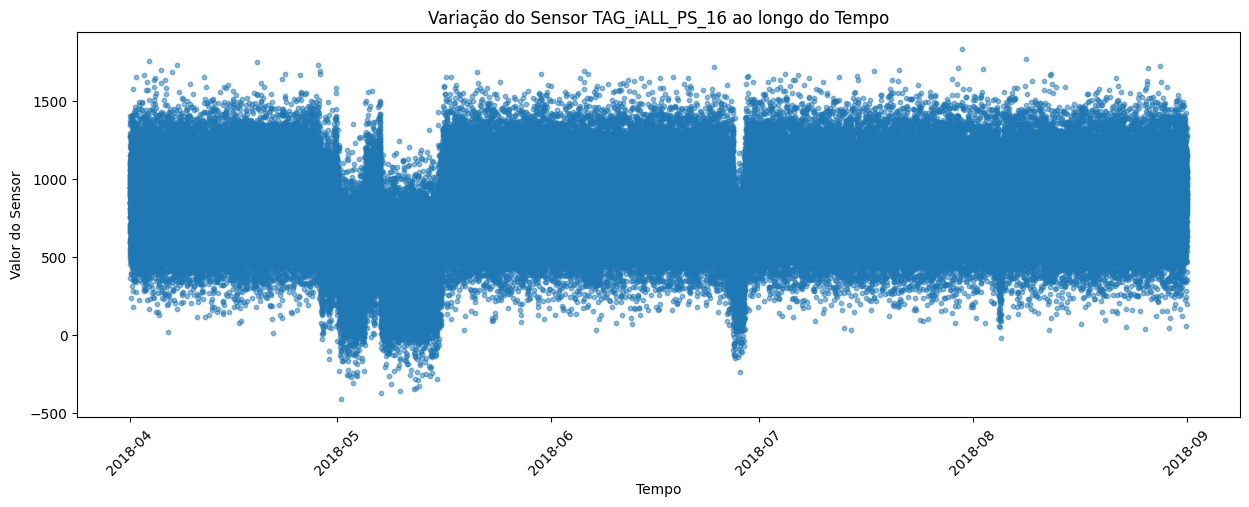

In [83]:
sensor = "TAG_iALL_PS_16" 

plt.figure(figsize=(15, 5))
plt.scatter(df_final["timestamp"], df_final[sensor], alpha=0.5, s=10)  # s=10 ajusta o tamanho dos pontos
plt.xlabel("Tempo")
plt.ylabel("Valor do Sensor")
plt.title(f"Variação do Sensor {sensor} ao longo do Tempo")
plt.xticks(rotation=45)
plt.show()

## Plotando os dados de um sensor 

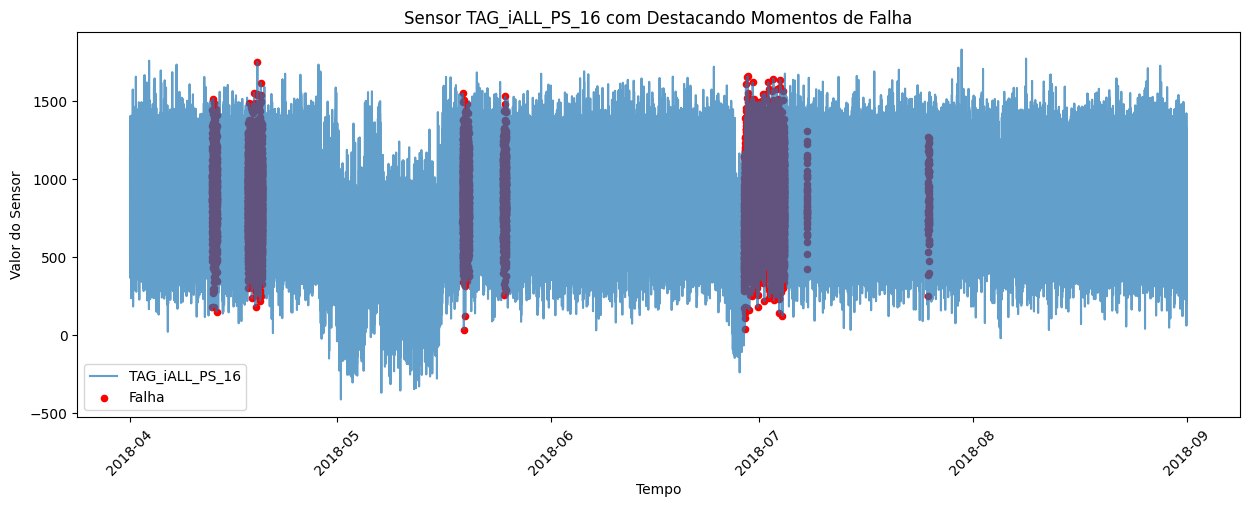

In [84]:
plt.figure(figsize=(15, 5))

# Escolher um sensor
sensor = "TAG_iALL_PS_16"

# Plotar a linha do sensor
plt.plot(df_final["timestamp"], df_final[sensor], label=sensor, alpha=0.7)

# Destacar momentos de falha
falha = df_final[df_final["target_iALL_PS"] != "NORMAL"]
plt.scatter(falha["timestamp"], falha[sensor], color='red', label="Falha", s=20)

plt.xlabel("Tempo")
plt.ylabel("Valor do Sensor")
plt.title(f"Sensor {sensor} com Destacando Momentos de Falha")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [85]:
print(df_final["target_iALL_PS"].value_counts())  # Conta quantos NORMAL/FAULT/etc.

target_iALL_PS
NORMAL     205836
ANORMAL     14484
Name: count, dtype: int64


In [113]:
df_normal = df_final[df_final["target_iALL_PS"] == "NORMAL"]
df_falha = df_final[df_final["target_iALL_PS"] != "NORMAL"]

In [87]:
# Estatísticas dos sensores antes e durante falhas
print(df_normal.describe())  

                           timestamp  TAG_iALL_PS_00  TAG_iALL_PS_01  \
count                         205836   205836.000000   205836.000000   
mean   2018-06-17 06:39:01.927068416        4.781892       95.768344   
min              2018-04-01 00:00:00       -5.857749     -158.448853   
25%              2018-05-09 13:14:45        3.201120       65.820798   
50%              2018-06-15 14:52:30        4.778736       95.692729   
75%              2018-07-27 06:20:15        6.366684      125.710630   
max              2018-08-31 23:59:00       14.841225      291.975927   
std                              NaN        2.354251       44.403886   

       TAG_iALL_PS_02  TAG_iALL_PS_03  TAG_iALL_PS_04  TAG_iALL_PS_05  \
count   205836.000000   205836.000000   205836.000000   205836.000000   
mean       102.332818       87.985549     1214.407785      148.795062   
min       -120.366566     -105.107634    -1678.761047     -150.546810   
25%         69.419927       60.204278      814.542017      

In [88]:
print(df_falha.describe())  

                           timestamp  TAG_iALL_PS_00  TAG_iALL_PS_01  \
count                          14484    14484.000000    14484.000000   
mean   2018-06-05 10:49:31.768848640        4.049206       86.788489   
min              2018-04-12 21:55:00       -5.793448      -69.294665   
25%              2018-04-19 21:05:45        4.736781       57.413602   
50%              2018-06-29 19:06:30        4.736781       87.063762   
75%              2018-07-02 07:27:15        4.736781      116.624286   
max              2018-07-25 15:15:00        9.705992      250.501402   
std                              NaN        1.663365       44.417317   

       TAG_iALL_PS_02  TAG_iALL_PS_03  TAG_iALL_PS_04  TAG_iALL_PS_05  \
count    14484.000000    14484.000000    14484.000000    14484.000000   
mean        90.791466       81.813782      683.748653      118.248157   
min       -111.724200      -92.964574    -1427.411597     -170.892724   
25%         57.815682       53.563463      284.082175      

# Começa treinar com o Random Forest

In [89]:
X = df_final.drop(columns=["timestamp", "target_iALL_PS"])  # Sensores como entrada
y = df_final["target_iALL_PS"]  # Target

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Converte NORMAL/FAULT/etc. para números

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2821
           1       1.00      1.00      1.00     41243

    accuracy                           0.99     44064
   macro avg       0.97      0.97      0.97     44064
weighted avg       0.99      0.99      0.99     44064



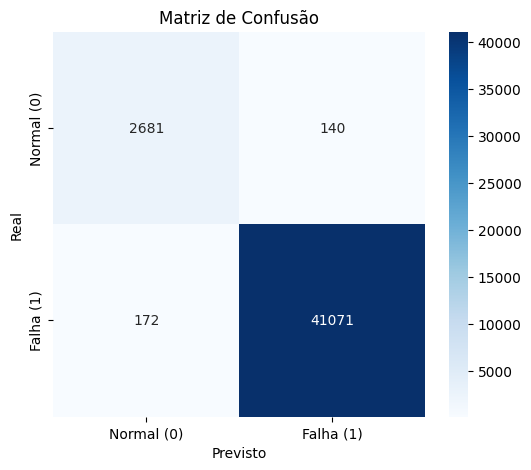

In [ ]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal (0)", "Falha (1)"], yticklabels=["Normal (0)", "Falha (1)"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Começa a treinar com o Gradient Boosting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Matriz de Confusão do GBT:


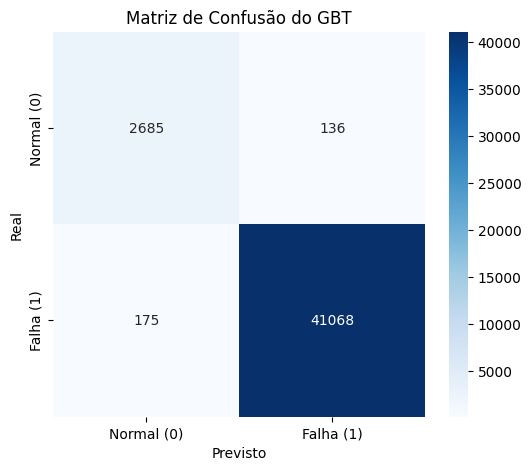


Relatório de Classificação do GBT:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2821
           1       1.00      1.00      1.00     41243

    accuracy                           0.99     44064
   macro avg       0.97      0.97      0.97     44064
weighted avg       0.99      0.99      0.99     44064



In [97]:
y_pred = gbt.predict(X_test)

print("Matriz de Confusão do GBT:")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal (0)", "Falha (1)"], yticklabels=["Normal (0)", "Falha (1)"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão do GBT")
plt.show()

print("\nRelatório de Classificação do GBT:")
print(classification_report(y_test, y_pred))

# Vendo a estatistica do com falha e sem falha

In [117]:
if not df_falha.empty:
    stats_falha = df_falha.describe()
else:
    print("Nenhum dado encontrado no momento da falha.")
    stats_falha = None  

# Estatísticas em momentos normais
stats_normal = df_normal.describe()

# Exibir os resultados
print("Estatísticas NO MOMENTO da falha:")
print(stats_falha)

print("\nEstatísticas em momentos normais:")
print(stats_normal)


Estatísticas NO MOMENTO da falha:
                           timestamp  TAG_iALL_PS_00  TAG_iALL_PS_01  \
count                          14484    14484.000000    14484.000000   
mean   2018-06-05 10:49:31.768848640        4.049206       86.788489   
min              2018-04-12 21:55:00       -5.793448      -69.294665   
25%              2018-04-19 21:05:45        4.736781       57.413602   
50%              2018-06-29 19:06:30        4.736781       87.063762   
75%              2018-07-02 07:27:15        4.736781      116.624286   
max              2018-07-25 15:15:00        9.705992      250.501402   
std                              NaN        1.663365       44.417317   

       TAG_iALL_PS_02  TAG_iALL_PS_03  TAG_iALL_PS_04  TAG_iALL_PS_05  \
count    14484.000000    14484.000000    14484.000000    14484.000000   
mean        90.791466       81.813782      683.748653      118.248157   
min       -111.724200      -92.964574    -1427.411597     -170.892724   
25%         57.815682    